## 모델 훈련용 공통함수

In [170]:
# 모델을 훈련시키고 결과를 보여주는 공통 함수

# 라이브러리 불러오기
## 모델들
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
## 결과 측정용
from sklearn.metrics import accuracy_score, precision_score, f1_score, \
                            explained_variance_score, classification_report

# 한가지 모델을 훈련하고 결과를 출력함
## model:   훈련시킬 모델
## average: 평가 함수에 사용되는 average. 무슨 의미인지는 불명확, 문서를 따름
def run_model_and_print_result(model, x_train, x_test, y_train, y_test, average):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if isinstance(model, LogisticRegression): # 문서의 regression에 사용하는 metric중 맨 위 것을 사용. 이유는 모름
        print('explained variance score: ', explained_variance_score(y_test, y_pred))
    else : # regression이 아닌 모델에는 다른 3종을 출력.
        print('accuracy score:  ', accuracy_score(y_test, y_pred))
        print('precision score: ', precision_score(y_test, y_pred, average=average))
        print('f1 score:        ', f1_score(y_test, y_pred, average=average))            
    print(classification_report(y_test, y_pred))


# 다섯가지 모델을 훈련하고 결과를 출력함
## splited_data: (x_train, x_test, y_train, y_test)임.
##               순서에 주의할 것
## average:      평가 함수에 사용되는 average. 무슨 의미인지는 불명확, 문서를 따름
def run_five_models_and_print_result(splited_data, average='macro'):
    print('## LEARNING START')
    print('')
    
    print('## Decision Tree ##')
    run_model_and_print_result(DecisionTreeClassifier(), *splited_data, average)
    print('')
    
    print('## Random Forest ##')
    run_model_and_print_result(RandomForestClassifier(), *splited_data, average)
    print('')
    
    print('## Support Vector Machine ##')
    run_model_and_print_result(SVC(), *splited_data, average)
    print('')
    
    print('## Stochastic Gradient Descent ##')
    run_model_and_print_result(SGDClassifier(), *splited_data, average)
    print('')
    
    print('## Logistic Regression ##')
    run_model_and_print_result(LogisticRegression(max_iter=5000), *splited_data, average)
    print('')
    
    print('## END ##')
    
print('함수가 생성되었습니다')

함수가 생성되었습니다


아래에 사용될 모델 학습을 함수로 만들었다.  
   
Regression에는 평가 방법을 다르게 사용해야 한다는 이야기가 있어, 문서에 나온 것 중 첫번째를 사용하였다.   
그러나 왜인지 이론적인 내용을 모른다.   
참고한 문서: https://scikit-learn.org/stable/modules/model_evaluation.html   
   
나머지 모델에 대해서는 중요하다고 생각한 평가 지표 3가지를 나타내었다.   
accuracy score: TP, TN의 평가   
precision score: TP, FP의 평가   
f1 score: FP, FN의 평가   

# load_digits

## Target Names ## 
[0 1 2 3 4 5 6 7 8 9]

## 데이터 톺아보기 ##


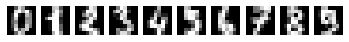


## LEARNING START

## Decision Tree ##
accuracy score:   0.8583333333333333
precision score:  0.8641517550760026
f1 score:         0.8610784983369782
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.81      0.83      0.82        42
           2       0.79      0.85      0.82        40
           3       0.91      0.91      0.91        34
           4       0.80      0.95      0.86        37
           5       0.90      0.96      0.93        28
           6       0.96      0.93      0.95        28
           7       0.93      0.79      0.85        33
           8       0.82      0.65      0.73        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360


## Random Forest ##
accuracy score:   0.9638888888888889
precision score:  0.964032294813

In [171]:
# 라이브러리 불러오기
## 데이터용
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
## 그림그리기
import matplotlib.pyplot as plt
%matplotlib inline

# 글씨 데이터 불러오기
loaded_digits = load_digits()

# 사용할 이미지 데이터와 라벨
raw_datum = loaded_digits.data
raw_labels = loaded_digits.target
print('## Target Names ## ')
print(loaded_digits.target_names)
print('')

print('## 데이터 톺아보기 ##')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(raw_datum[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()
print('')

# 데이터를 훈련용과 테스트용으로 나눔
splited_data = train_test_split(raw_datum, raw_labels, test_size=0.2, random_state=7)

# 다섯가지 모델을 훈련시키고 결과를 출력함
run_five_models_and_print_result(splited_data)


각 평가 지표가 비슷하게 나온 가운데 Regression의 평가 점수는 좋지 않다.  
하지만 실제 Regression으로 나온 결과를 보면 그다지 나쁘지 않은데, 연속적인 값을 예측하는 평가 지표를 사용하였기 때문이 아닐까 추측된다.  
맞는 값에서도 점수 하락이 발생하게 된 것이 아닌가 추측. 이론적인 부분을 몰라 알 수 없다.  

## 데이터를 표로 보여주는 공통함수

In [172]:
# 데이터를 보여주는 공통 함수

# 라이브러리 불러오기
import pandas as pd

# 데이터를 표 형태로 나타냄
def describe_data_with_data_frame(data, columns, labels):
    data_frame = pd.DataFrame(data=data, columns=columns)
    data_frame['label'] = labels
    print(data_frame)
    
print('함수가 생성되었습니다')

함수가 생성되었습니다


이 함수는 아래에 데이터를 표로 보여주기 위해 만들었다.

# load_wine

In [176]:
# 라이브러리 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# 와인 데이터 불러오기
loaded_wines = load_wine()

# 사용할 이미지 데이터와 라벨
raw_datum = loaded_wines.data
raw_labels = loaded_wines.target
print('## Target Names ## ')
print(loaded_wines.target_names)
print('')

print('## 데이터 톺아보기 ##')
describe_data_with_data_frame(raw_datum, loaded_wines.feature_names, raw_labels)
print('')

# 데이터를 훈련용과 테스트용으로 나눔
splited_data = train_test_split(raw_datum, raw_labels, test_size=0.2, random_state=1)

# 다섯가지 모델을 훈련시키고 결과를 출력함
run_five_models_and_print_result(splited_data)

## Target Names ## 
['class_0' 'class_1' 'class_2']

## 데이터 톺아보기 ##
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0   

한 모델 평가 지표들은 비슷하게 나온 가운데, 모델마다 평가 점수에 차이가 많다
SVM, SGD가 많이 저조하다

# load_breast_cancer

In [177]:
# 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 유방암 데이터 불러오기
loaded_cancers = load_breast_cancer()

# 사용할 이미지 데이터와 라벨
raw_datum = loaded_cancers.data
raw_labels = loaded_cancers.target
print('## Target Names ## ')
print(loaded_cancers.target_names)
print('')

print('## 데이터 톺아보기 ##')
describe_data_with_data_frame(raw_datum, loaded_cancers.feature_names, raw_labels)
print('')

# 데이터를 훈련용과 테스트용으로 나눔
splited_data = train_test_split(raw_datum, raw_labels, test_size=0.2, random_state=7)

# 다섯가지 모델을 훈련시키고 결과를 출력함
## label이 두가지이므로 결과 측정에 binary 사용 => 어떤 영향이 있는지는 불명확, 단순히 문서를 따름
run_five_models_and_print_result(splited_data, average='binary')


## Target Names ## 
['malignant' 'benign']

## 데이터 톺아보기 ##
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

    

질병과 관련되었으므로 양성의 검출이 더 중요하다.   
그러므로 f1 score가 더 중요한 판단 요소가 되고, random forest가 가장 좋은 결과를 보였다.   